In [2]:
import pandas as pd
import datetime as dt

stocks = pd.read_csv('sp500.csv')
stocks.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [3]:
stocks['Tomorrow'] = stocks['Close'].shift(-1)
stocks

,Date,Open,High,Low,Close,Volume,Tomorrow
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...,...
18206,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932
18207,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078
18208,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893
18209,2022-05-13,3963.899902,4038.879883,3963.899902,4023.889893,4142950000,4008.010010


We have added a 'Tomorrow' column which is the closing price of the day after the one in each row.

In [4]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[stocks['Date'].dt.year >= 1990]
stocks.drop(labels = 18210, axis = 0, inplace = True)
stocks

C:\Users\green\AppData\Local\Temp\ipykernel_21816\1853656538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks.drop(labels = 18210, axis = 0, inplace = True)


,Date,Open,High,Low,Close,Volume,Tomorrow
10054,1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
10055,1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
10056,1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
10057,1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
10058,1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...,...
18205,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,4001.050049
18206,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932
18207,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078
18208,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893


We have converted the 'Date' column to a datetime object to make it easier to work with, and we have only taken data from the years on or after 1990.

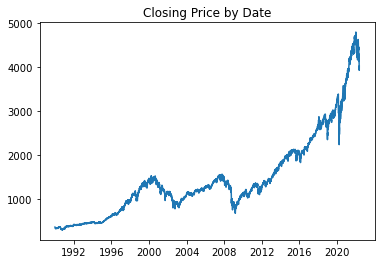

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(stocks['Date'], stocks['Close'])
plt.title('Closing Price by Date')
plt.show()

In [163]:
stocks['Target'] = (stocks['Tomorrow'] > stocks['Close']).astype('int')
stocks

C:\Users\green\AppData\Local\Temp\ipykernel_42864\2443881455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['Target'] = (stocks['Tomorrow'] > stocks['Close']).astype('int')


,Date,Open,High,Low,Close,Volume,Tomorrow,Target
10054,1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
10055,1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
10056,1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
10057,1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
10058,1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...,...
18205,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,4001.050049,1
18206,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932,0
18207,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078,0
18208,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893,1


We created a target column that tests whether tomorrows price is greater than today's closing price.

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import train_test_split

X = stocks.drop(['Target'], axis = 1)
y = stocks['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 69)

In [166]:
model1 = RandomForestClassifier(n_estimators = 400, n_jobs = -1, random_state = 69)
model1.fit(X_train.drop('Date', axis = 1), y_train)
pred_1 = model1.predict(X_test.drop('Date', axis = 1))
prec_accuracy = precision_score(pred_1, y_test)
accuracy = accuracy_score(pred_1, y_test)
print("The precision score of model1 is: ", prec_accuracy)
print("The accuracy score of model1 is: ", accuracy)

The precision score of model1 is:  0.8383685800604229
The accuracy score of model1 is:  0.7842255823457295


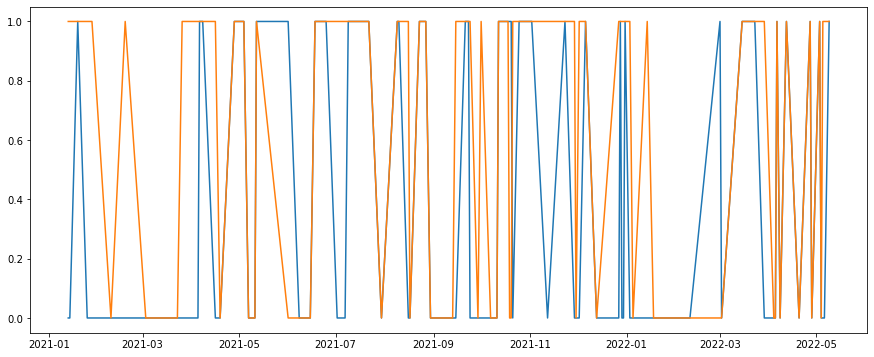

In [122]:
comparison = pd.DataFrame(data = {'date': X_test['Date'], "y_test": y_test, "pred_1": pred_1})
comparison.sort_values('date', inplace = True)

import matplotlib.pyplot as plt
%matplotlib inline

comparison_recent = comparison.iloc[-100:,]
plt.figure(figsize = (15, 6))
plt.plot(comparison_recent['date'], comparison_recent['y_test'])
plt.plot(comparison_recent['date'], comparison_recent['pred_1'])
plt.show()

In [31]:
unique_years = list(set(stocks['Date'].dt.year))
print(unique_years)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [54]:
X = stocks.drop(['Target'], axis = 1)
y = stocks[['Target', 'Date']]

def backtest(year):
    X_current = X[X['Date'].dt.year == year].drop('Date', axis = 1)
    y_current = y[y['Date'].dt.year == year].drop('Date', axis = 1)
    X_past = X[X['Date'].dt.year == year-1].drop('Date', axis = 1)
    y_past = y[y['Date'].dt.year == year-1].drop('Date', axis = 1)
    model1.fit(X_past, y_past)
    predictions = model1.predict(X_current)
    return accuracy_score(predictions, y_current)

backtest(2018)

C:\Users\green\AppData\Local\Temp\ipykernel_42864\1586834650.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_past, y_past)


0.5258964143426295

We have created a backtesting system that takes a year as input and trains our model on data from the year prior and tests the model on data from the current year.

In [ ]:
year_scores = []
for year in unique_years[1:]:
    year_scores.append(backtest(year))

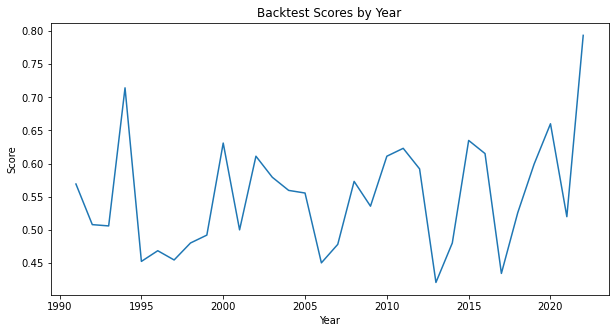

In [64]:
plt.figure(figsize = (10, 5))
plt.plot(unique_years[1:], year_scores)
plt.title('Backtest Scores by Year')
plt.ylabel('Score')
plt.xlabel('Year')
plt.show()

This is the result of using our backtesting function for every year in our dataset. We see that the accuracy of the backtesting system is subject to high variability on a yearly basis.

In [68]:
rolling_5_day = stocks[['Close', 'Date']].rolling(window = 5, min_periods = 5, on = 'Date').mean().round(2)
rolling_5_day

,Close,Date
10054,NaN,1990-01-02
10055,NaN,1990-01-03
10056,NaN,1990-01-04
10057,NaN,1990-01-05
10058,356.02,1990-01-08
...,...,...
18205,4147.42,2022-05-09
18206,4112.53,2022-05-10
18207,4039.54,2022-05-11
18208,3996.18,2022-05-12


In [70]:
rolling_30_day = stocks[['Close', 'Date']].rolling(window = 30, min_periods = 30, on = 'Date').mean().round(2)
rolling_30_day

,Close,Date
10054,NaN,1990-01-02
10055,NaN,1990-01-03
10056,NaN,1990-01-04
10057,NaN,1990-01-05
10058,NaN,1990-01-08
...,...,...
18205,4368.61,2022-05-09
18206,4349.46,2022-05-10
18207,4326.25,2022-05-11
18208,4303.84,2022-05-12


In [71]:
rolling_90_day = stocks[['Close', 'Date']].rolling(window = 90, min_periods = 90, on = 'Date').mean().round(2)
rolling_90_day

,Close,Date
10054,NaN,1990-01-02
10055,NaN,1990-01-03
10056,NaN,1990-01-04
10057,NaN,1990-01-05
10058,NaN,1990-01-08
...,...,...
18205,4433.58,2022-05-09
18206,4424.94,2022-05-10
18207,4415.71,2022-05-11
18208,4406.08,2022-05-12


In [103]:
stocks_rolling = stocks.copy()
stocks_rolling['Rolling 90'] = rolling_90_day['Close']
stocks_rolling['Rolling 30'] = rolling_30_day['Close']
stocks_rolling['Rolling 5'] = rolling_5_day['Close']
stocks_rolling

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Rolling 90,Rolling 30,Rolling 5
10054,1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN
10055,1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,NaN,NaN,NaN
10056,1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,NaN,NaN,NaN
10057,1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,NaN,NaN,NaN
10058,1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,NaN,NaN,356.02
...,...,...,...,...,...,...,...,...,...,...,...
18205,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,4001.050049,1,4433.58,4368.61,4147.42
18206,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932,0,4424.94,4349.46,4112.53
18207,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078,0,4415.71,4326.25,4039.54
18208,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893,1,4406.08,4303.84,3996.18


We have added a variety of rolling means to our dataset to see if including them yields more accurate predictions.

In [123]:
stocks_rolling = stocks_rolling.iloc[90:]
stocks_rolling

X = stocks_rolling.drop(['Date', 'Target'], axis = 1)
y = stocks_rolling['Target']

X_trainr, X_testr, y_trainr, y_testr = train_test_split(X, y, test_size = .3, random_state = 69)
model1.fit(X_trainr, y_trainr)
predictions_r = model1.predict(X_testr)
prec_accuracy = precision_score(y_testr, predictions_r)
accuracy = accuracy_score(y_testr, predictions_r)

print("The precision score of model1 is: ", prec_accuracy)
print("The accuracy score of model1 is: ", accuracy)

The precision score of model1 is:  0.7577358490566037
The accuracy score of model1 is:  0.7434801197092775


Surprisingly, training our model on rolling accuracy along with the original features actually worstened model performance, indicating that rolling averages are not necessarily good predictors of tomorrows price being above the closing price.

In [179]:
X = stocks.drop(['Target', 'Date'], axis = 1)
probabilities_of_class = model1.predict_proba(X)
one_probs = []
for probs in probabilities_of_class:
    one_probs.append(probs[1])
one_probs = pd.DataFrame(one_probs, columns = ['Higher prob Target'])
one_probs = one_probs['Higher prob Target'].astype('float')
one_probs

0       0.3300
1       0.3850
2       0.0500
3       0.8050
4       0.2800
         ...  
8151    0.6250
8152    0.1625
8153    0.0800
8154    0.9050
8155    0.3075
Name: Higher prob Target, Length: 8156, dtype: float64

In [200]:
stocks = stocks.reset_index(drop = True)
stocks_highp = stocks.copy()
stocks_highp = pd.concat([stocks_highp, one_probs], axis = 1)
stocks_highp['Higher prob Target'] = (stocks_highp['Higher prob Target'] >= .6).astype('int')
stocks_highp

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Higher prob Target
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,0
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,1
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,0
...,...,...,...,...,...,...,...,...,...
8151,2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,4746120000,4001.050049,1,1
8152,2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4630150000,3935.179932,0,0
8153,2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,4683220000,3930.080078,0,0
8154,2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,4964130000,4023.889893,1,1


We'll now train the model on data that requires a 60% threshold to have a 1 value in the target column. This means we must be more 'certain' that a positive observation is correct than in our original dataset.

In [201]:
X_h = stocks_highp.drop(['Date', 'Target', 'Higher prob Target'], axis = 1)
y_h = stocks_highp['Higher prob Target']

X_trainh, X_testh, y_trainh, y_testh = train_test_split(X_h, y_h, test_size = .3, random_state = 69)
model1.fit(X_trainh, y_trainh)
predictions_h = model1.predict(X_testh)
prec_accuracy = precision_score(y_testh, predictions_h)
accuracy = accuracy_score(y_testh, predictions_h)

print("The precision score of model1 is: ", prec_accuracy)
print("The accuracy score of model1 is: ", accuracy)

The precision score of model1 is:  0.7837078651685393
The accuracy score of model1 is:  0.8741315897016755


The accuracy of our model increases when we increase the threshold needed to have a target value of 1.